 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [60]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [44]:
class Video():
    
    def __init__(self):
        self.title = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.title}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
        
    

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [61]:
class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [77]:

class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self):
        data = None
        while not data:
            search = input('What is the name of this series?')
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={search}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series error: status code {r.status_code}")
                
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        self.network = data['network'] or data['webChannel']['name']
        
        #API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json() 
        else:
            print(f"episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input('Are you still watching? y/N')
                if watching.lower() not in ('yes','y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)

In [78]:
first_show = Series()
first_show.get_info()

What is the name of this series?bridgerton


In [79]:
len(first_show)

16

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


Now watching Diamond of the First Water
now playing Diamond of the First Water


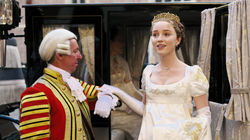

Now watching Shock and Delight
now playing Shock and Delight


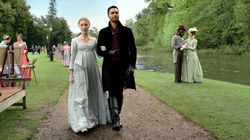

Now watching Art of the Swoon
now playing Art of the Swoon


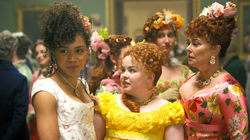

Are you still watching? y/Nn


In [34]:
first_show.watch()

In [66]:
show_2 = Series()
show_2.get_info()

What is the name of this series?spongebob


now playing Help Wanted


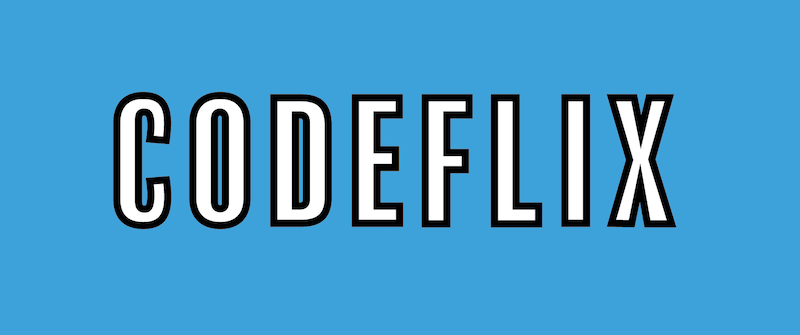

now playing Reef Blower


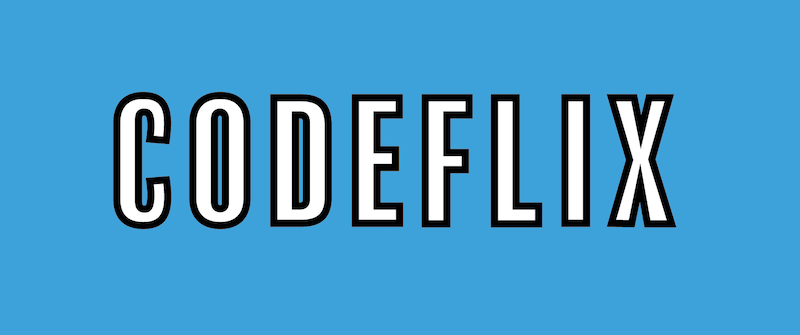

now playing Tea at the Treedome


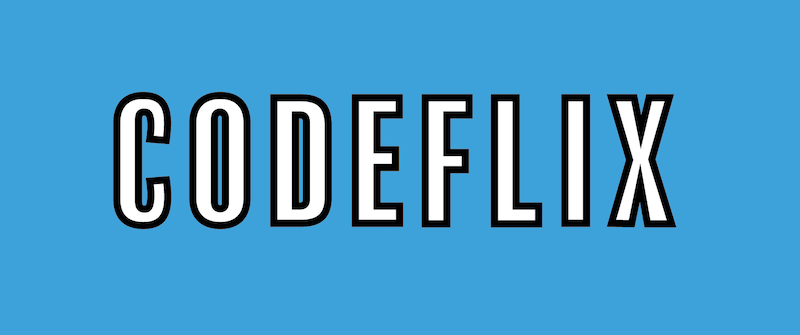

Are you still watching? y/Ny
now playing Bubblestand


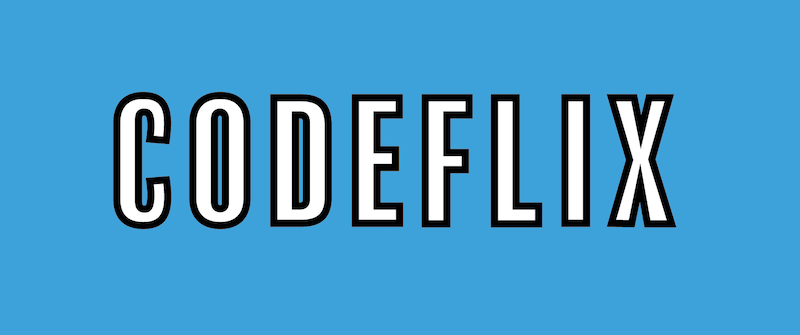

now playing Ripped Pants


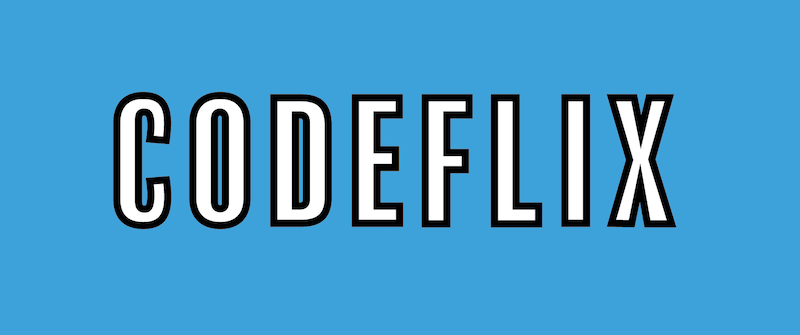

now playing Jellyfishing


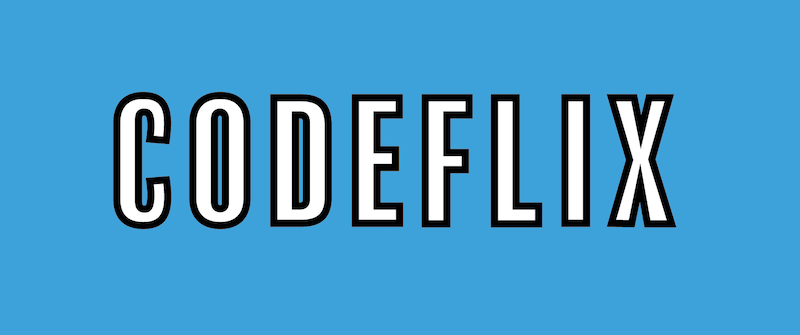

Are you still watching? y/Nn


In [67]:
show_2.watch()

In [ ]:
class Codeflix:
    def __init__(self):
        users = []
        

##  Exercise 1:
Discuss what other classes we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...